In [3]:
#負責讀檔

import pandas as pd

# 檔案名稱
file_path = 'processed_data.csv'

try:
    # 嘗試讀取 CSV 檔案
    # pd.read_csv() 會將 CSV 轉為一個 DataFrame 物件
    df = pd.read_csv(file_path)
    
    # (可選) 印出資料的前 5 行，確認讀取成功且內容正確
    print(f"成功讀取檔案： {file_path}")
    print("資料前 5 行預覽：")
    print(df.head())
    
    # (可選) 顯示 DataFrame 的基本資訊 (欄位名稱、資料型態、是否有缺失值)
    print("\n資料基本資訊：")
    df.info()

except FileNotFoundError:
    print(f"錯誤：找不到檔案 '{file_path}'")
    print("請確認：")
    print(f"1. 檔案名稱 '{file_path}' 是否拼寫正確？")
    print("2. 這個 CSV 檔案是否和您的 Python 程式碼在同一個資料夾中？")
    print("3. 如果不在同一個資料夾，請提供完整的絕對路徑。")

except Exception as e:
    print(f"讀取檔案時發生其他錯誤： {e}")

成功讀取檔案： processed_data.csv
資料前 5 行預覽：
   rally  ball_round      time  frame_num  score_status  player_score  \
0      1           1   0:07:39    11496.0           0.0           0.0   
1      1           2  00:07:43    11582.0           0.0           0.0   
2      2           1   0:07:55    11881.0           1.0           1.0   
3      2           2   0:07:56    11900.0           1.0           1.0   
4      2           3   0:07:56    11921.0           1.0           1.0   

   opponent_score          player  server type  ...  player_move_area  \
0             0.0    Kento MOMOTA     1.0  發短球  ...              11.0   
1             0.0  CHOU Tien Chen     3.0   長球  ...              18.0   
2             0.0    Kento MOMOTA     1.0  發短球  ...              11.0   
3             0.0  CHOU Tien Chen     2.0  推撲球  ...              10.0   
4             0.0    Kento MOMOTA     2.0   殺球  ...               7.0   

   moving_x  moving_y  landing_court_number  ball_distance_x  ball_distance_y  \
0  

36

In [ ]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:  # Linux (Streamlit Cloud)
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'DejaVu Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選 CHOU Tien Chen 的挑球和網前球
chou_netting = df[(df['player'] == 'CHOU Tien Chen') & (df['type'].isin(['挑球', '網前球']))]

# 計算總回合數
total_rallies = chou_netting.groupby(['match_id', 'set', 'rally'])['player'].count().reset_index()
total_rallies_count = len(total_rallies)

# 計算失分回合數
lost_rallies = chou_netting.groupby(['match_id', 'set', 'rally'])['getpoint_player'].last().reset_index()
lost_rallies = lost_rallies[lost_rallies['getpoint_player'] != 'CHOU Tien Chen']
lost_rallies_count = len(lost_rallies)

# 計算失分率
if total_rallies_count > 0:
    失分率 = (lost_rallies_count / total_rallies_count) * 100
    print(f"周天成使用「挑球」或「網前球」時的失分率: {失分率:.2f}%")
else:
    失分率 = 0
    print("沒有找到周天成使用「挑球」或「網前球」的資料")


# 建立長條圖
fig, ax = plt.subplots(figsize=(12, 7))

# 長條圖數據
labels = ['失分率', '未失分率']
sizes = [失分率, 100 - 失分率]
colors = ['#FF6B6B', '#4ECDC4']

# 繪製長條圖
bars = ax.bar(labels, sizes, color=colors, alpha=0.7)

# 在柱子上方標註數值
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# 設定標題和標籤
ax.set_title('周天成使用「挑球」或「網前球」時的失分率', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('百分比', fontsize=12)

# 加入網格線
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# 調整布局
plt.tight_layout()

37

In [ ]:
import platform
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:  # Linux (Streamlit Cloud)
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'DejaVu Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選 CHOU Tien Chen 的失誤資料
chou_errors = df[(df['player'] == 'CHOU Tien Chen') & (df['lose_reason'].isin(['掛網', '出界']))]

# 檢查是否有資料
if len(chou_errors) == 0:
    print("沒有找到 CHOU Tien Chen 的掛網或出界失誤資料")
    fig, ax = plt.subplots(figsize=(12, 7))  # 創建一個空的圖表，避免錯誤
else:
    # 繪製二維密度圖
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.kdeplot(x=chou_errors['player_location_x'], y=chou_errors['player_location_y'], cmap="viridis", fill=True, ax=ax)

    # 設定標題和標籤
    ax.set_title('周天成掛網/出界失誤時的站位分佈 (熱區圖)', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('球員位置 X 座標', fontsize=12)
    ax.set_ylabel('球員位置 Y 座標', fontsize=12)

    # 增加顏色條 (colorbar)
    cbar = fig.colorbar(ax.collections[0], ax=ax)
    cbar.set_label('密度')

    # 調整布局
    plt.tight_layout()

38

In [ ]:
import platform
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:  # Linux (Streamlit Cloud)
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'DejaVu Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選 CHOU Tien Chen 失分的資料
chou_lost_points = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] != 'CHOU Tien Chen')]

# 統計對手得分的 win_reason 欄位中每個原因出現的次數
if not chou_lost_points.empty:
    opponent_win_reasons = chou_lost_points['win_reason'].value_counts()

    # 找出最常出現的得分原因
    most_frequent_win_reason = opponent_win_reasons.index[0]
    most_frequent_win_reason_count = opponent_win_reasons.iloc[0]

    print(f"對手從周天成身上得分最常見的原因是: {most_frequent_win_reason} (出現次數: {most_frequent_win_reason_count})")
else:
    most_frequent_win_reason = None
    print("沒有找到周天成失分的資料")

# 繪製長條圖
if not chou_lost_points.empty:
    fig, ax = plt.subplots(figsize=(12, 7))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
    opponent_win_reasons.plot(kind='bar', color=colors, ax=ax)

    # 設定標題和標籤
    ax.set_title('對手從周天成身上得分的原因分佈', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('得分原因', fontsize=12)
    ax.set_ylabel('次數', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # 標註數值
    for i, v in enumerate(opponent_win_reasons.values):
        ax.text(i, v + 0.1, str(v), ha='center', fontsize=10)

    # 加入網格線
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')

    # 調整布局
    plt.tight_layout()
else:
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.text(0.5, 0.5, '沒有找到周天成失分的資料', horizontalalignment='center', verticalalignment='center', fontsize=14)
    ax.axis('off')

39

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:  # Linux (Streamlit Cloud)
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'DejaVu Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選出對手得分的球
opponent_score = df[df['getpoint_player'] != 'CHOU Tien Chen'].copy()

# 建立固定尺寸的圖表
fig, ax = plt.subplots(figsize=(12, 7))

# 繪製熱區圖
sns.kdeplot(x=opponent_score['landing_x'], y=opponent_score['landing_y'], cmap="viridis", fill=True, ax=ax)

# 設定標題和標籤
ax.set_title('對手得分球的落點分佈熱區圖', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Landing X', fontsize=12)
ax.set_ylabel('Landing Y', fontsize=12)

# 調整刻度標籤大小
ax.tick_params(axis='both', which='major', labelsize=10)

# 增加網格線
ax.grid(True, alpha=0.3, linestyle='--')

# 調整布局
plt.tight_layout()

In [ ]:
40

周天成被調動到球場四個角落時的失分率為: 21.62%


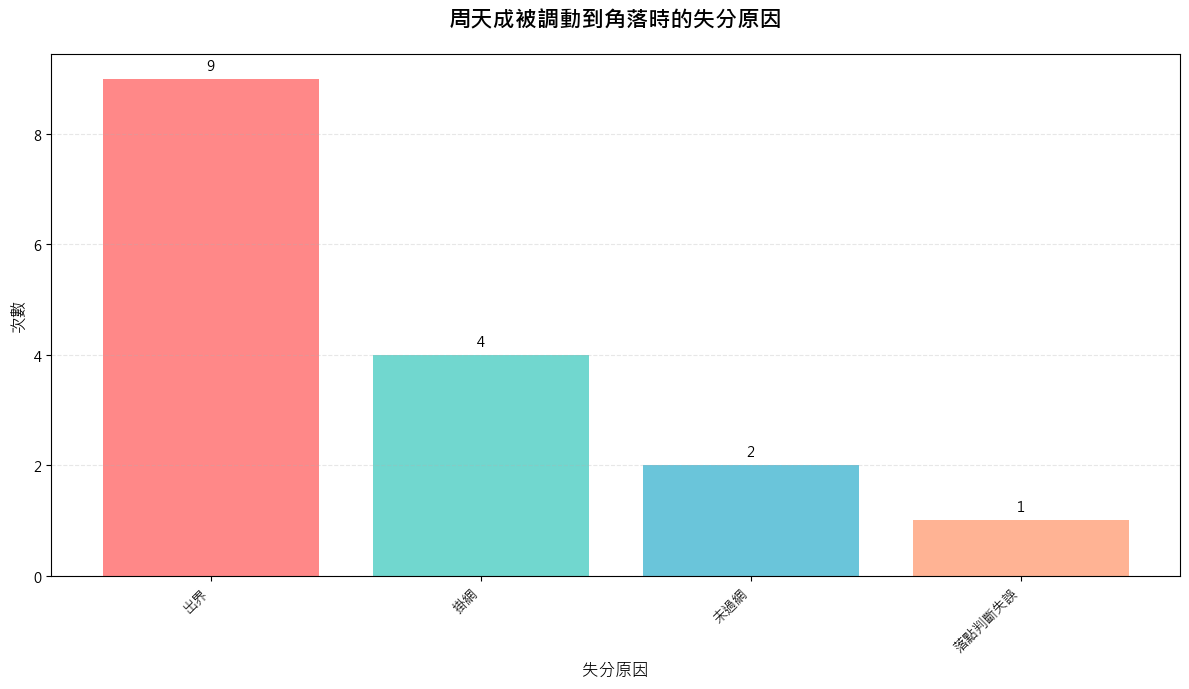

In [11]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'WenQuanYi Micro Hei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選資料
chou_corner = df[(df['player'] == 'CHOU Tien Chen') & (df['player_move_area'].isin([1, 8, 25, 32]))]

# 計算失分率
if len(chou_corner) > 0:
    lose_reason_not_null = chou_corner['lose_reason'].notna().sum()
    lose_rate = lose_reason_not_null / len(chou_corner) * 100
    print(f"周天成被調動到球場四個角落時的失分率為: {lose_rate:.2f}%")

    # 繪製長條圖
    fig, ax = plt.subplots(figsize=(12, 7))
    lose_reasons = chou_corner['lose_reason'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

    bars = ax.bar(lose_reasons.index, lose_reasons.values, color=colors, alpha=0.8)

    for i, v in enumerate(lose_reasons.values):
        ax.text(i, v + max(lose_reasons.values)*0.01, str(int(v)),
                ha='center', va='bottom', fontsize=10)

    ax.set_title('周天成被調動到角落時的失分原因', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('失分原因', fontsize=12)
    ax.set_ylabel('次數', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')
    plt.tight_layout()
else:
    print("找不到周天成在球場四個角落的數據")
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.text(0.5, 0.5, '找不到周天成在球場四個角落的數據', ha='center', va='center', fontsize=12)
    ax.axis('off')
    plt.tight_layout()

In [ ]:
41

當對手殺球時，周天成的失分比例為: 12.24%


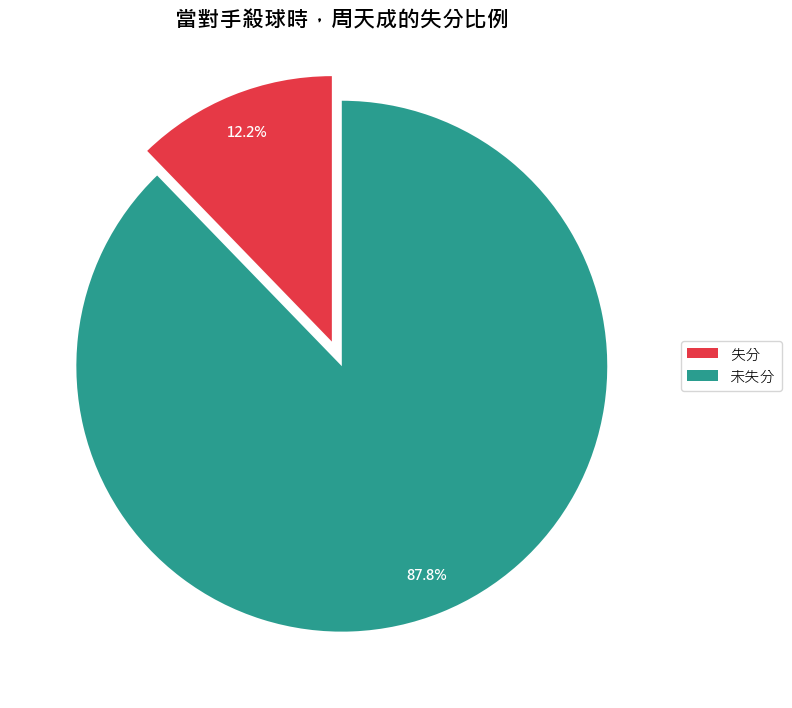

In [12]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'WenQuanYi Micro Hei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選資料
chou_defense_smash = df[(df['player'] == 'CHOU Tien Chen') & (df['opponent_type'] == 4)]

# 計算失分比例
if len(chou_defense_smash) > 0:
    lose_reason_not_null = chou_defense_smash['lose_reason'].notna().sum()
    lose_rate = lose_reason_not_null / len(chou_defense_smash) * 100
    print(f"當對手殺球時，周天成的失分比例為: {lose_rate:.2f}%")

    # 繪製圓餅圖
    fig, ax = plt.subplots(figsize=(8, 8))
    labels = ['失分', '未失分']
    sizes = [lose_reason_not_null, len(chou_defense_smash) - lose_reason_not_null]
    colors = ['#E63946', '#2A9D8F']
    explode = (0.1, 0)  # 將第一塊扇形拉出

    wedges, texts, autotexts = ax.pie(sizes, explode=explode, autopct='%1.1f%%', startangle=90,
                                      colors=colors, textprops=dict(color="w"), pctdistance=0.85)

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)
    ax.set_title('當對手殺球時，周天成的失分比例', fontsize=16, fontweight='bold')
    plt.tight_layout()

else:
    print("找不到對手殺球時，周天成的數據")
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.text(0.5, 0.5, '找不到對手殺球時，周天成的數據', ha='center', va='center', fontsize=12)
    ax.axis('off')
    plt.tight_layout()

42

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 根據作業系統設定中文字體
system = platform.system()
if system == 'Darwin':  # macOS
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:  # Linux
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'WenQuanYi Micro Hei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 定義場地區域劃分
front_area = [1, 2, 3, 4, 27, 28, 31, 32]
mid_area = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 26, 30]
back_area = [17, 18, 19, 20, 21, 22, 23, 24, 25, 29]

# 篩選周天成的數據
chou_data = df[df['player'] == 'CHOU Tien Chen'].copy()

# 驗證周天成的數據是否存在
if len(chou_data) == 0:
    print("找不到周天成的數據")
else:
    # 定義函數來判斷區域
    def get_area(location):
        if location in front_area:
            return '前場'
        elif location in mid_area:
            return '中場'
        elif location in back_area:
            return '後場'
        else:
            return '未知'

    # 應用函數，建立新的 'area' 欄位
    chou_data['area'] = chou_data['player_location_area'].apply(get_area)

    # 計算每個區域的回球總次數
    total_counts = chou_data['area'].value_counts()

    # 計算每個區域的失分次數
    lose_counts = chou_data[chou_data['lose_reason'].notna()]['area'].value_counts()

    # 合併兩個 Series，並計算失分率
    combined_data = pd.concat([total_counts, lose_counts], axis=1, keys=['total', 'lose']).fillna(0)
    combined_data['lose_rate'] = combined_data['lose'] / combined_data['total']

    # 打印結果
    print(combined_data)

    # 繪製長條圖
    fig, ax = plt.subplots(figsize=(12, 7))
    colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
    bars = ax.bar(combined_data.index, combined_data['lose_rate'], color=colors[0], alpha=0.8)

    # 在柱子上方標註數值
    for i, v in enumerate(combined_data['lose_rate']):
        ax.text(i, v + max(combined_data['lose_rate'])*0.01, str(round(v * 100, 2)) + '%',
                ha='center', va='bottom', fontsize=10)

    # 設定標題和標籤
    ax.set_title('周天成在不同區域的回球失分率', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('區域', fontsize=12)
    ax.set_ylabel('失分率', fontsize=12)

    # 設定X軸刻度
    ax.set_xticks(range(len(combined_data.index)))
    ax.set_xticklabels(combined_data.index, rotation=45, ha='right', fontsize=10)

    # 加入網格線
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')

    # 調整布局
    plt.tight_layout()

43

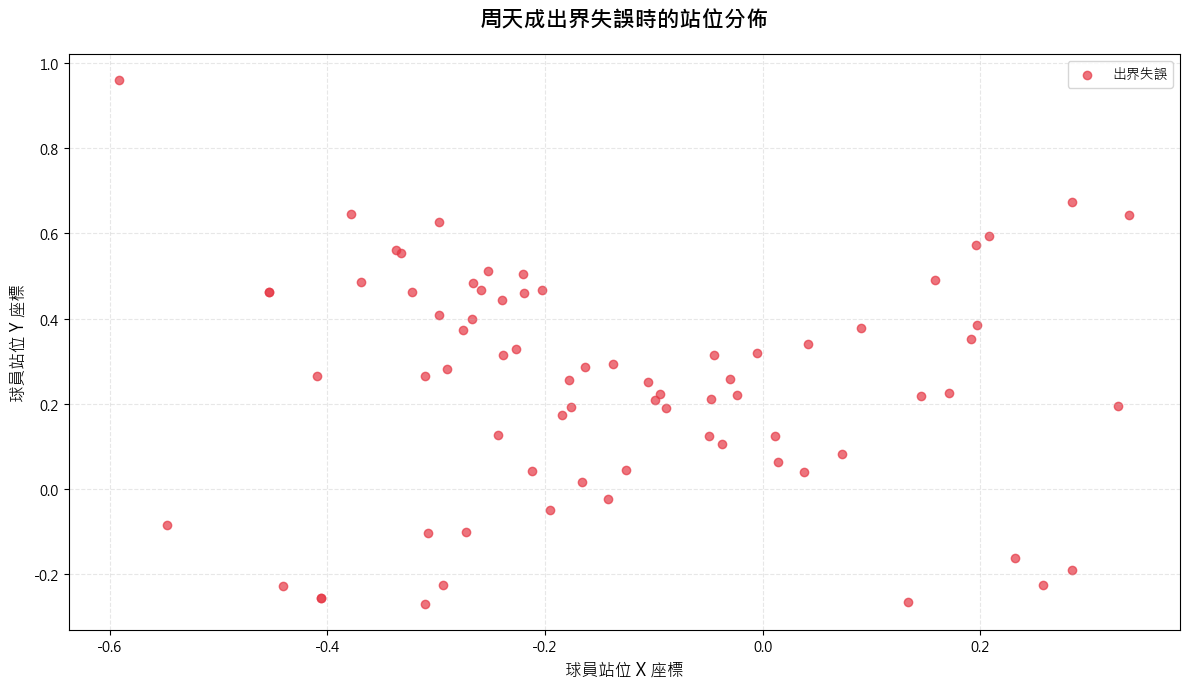

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 根據作業系統設定中文字體
system = platform.system()
if system == 'Darwin':  # macOS
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:  # Linux
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'WenQuanYi Micro Hei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選數據
chou_out = df[(df['player'] == 'CHOU Tien Chen') & (df['lose_reason'] == '出界')]

# 驗證是否有數據
if len(chou_out) == 0:
    print("找不到符合條件的數據")
else:
    # 繪製散佈圖
    fig, ax = plt.subplots(figsize=(12, 7))

    ax.scatter(chou_out['player_location_x'], chou_out['player_location_y'], color='#E63946', alpha=0.7, label='出界失誤')

    # 設定標題和標籤
    ax.set_title('周天成出界失誤時的站位分佈', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('球員站位 X 座標', fontsize=12)
    ax.set_ylabel('球員站位 Y 座標', fontsize=12)

    # 加入網格線
    ax.grid(True, alpha=0.3, linestyle='--')

    # 加入圖例
    ax.legend(fontsize=10, loc='best')

    # 調整佈局
    plt.tight_layout()

44

In [ ]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:  # Linux (Streamlit Cloud)
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'DejaVu Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選資料
chou_defense = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '接殺防守')]

# 計算失誤比例
total_defense = len(chou_defense)
if total_defense > 0:
    error_defense = chou_defense['lose_reason'].notna().sum()
    error_rate = error_defense / total_defense
    print(f"CHOU Tien Chen 接殺防守失誤率: {error_rate:.2f}")

    # 繪製圓餅圖
    labels = ['失誤', '未失誤']
    sizes = [error_defense, total_defense - error_defense]
    colors = ['#E63946', '#2A9D8F']

    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90,
                                      colors=colors, pctdistance=0.85)

    # 設定百分比文字格式
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    ax.axis('equal')  # 讓圓餅圖是正圓
    ax.set_title('CHOU Tien Chen 接殺防守失誤比例', fontsize=16, fontweight='bold')

    # 添加圖例
    ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)
    plt.tight_layout()
else:
    print("沒有找到 CHOU Tien Chen 的接殺防守數據")
    fig, ax = plt.subplots(figsize=(8, 6)) # 建立一個空的圖表，避免後續的 Streamlit 顯示錯誤

44

In [ ]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:  # Linux (Streamlit Cloud)
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei', 'DejaVu Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選資料
chou_defense = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '接殺防守')]

# 計算失誤比例
total_defense = len(chou_defense)
if total_defense > 0:
    error_defense = chou_defense['lose_reason'].notna().sum()
    error_rate = error_defense / total_defense
    print(f"CHOU Tien Chen 接殺防守失誤率: {error_rate:.2f}")

    # 繪製圓餅圖
    labels = ['失誤', '未失誤']
    sizes = [error_defense, total_defense - error_defense]
    colors = ['#E63946', '#2A9D8F']

    fig, ax = plt.subplots(figsize=(12, 7))
    wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90,
                                      colors=colors, pctdistance=0.85)

    # 設定百分比文字格式
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    ax.axis('equal')  # 讓圓餅圖是正圓
    ax.set_title('CHOU Tien Chen 接殺防守失誤比例', fontsize=16, fontweight='bold')

    # 添加圖例
    ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)
    plt.tight_layout()
else:
    print("沒有找到 CHOU Tien Chen 的接殺防守數據")
    fig, ax = plt.subplots(figsize=(12, 7)) # 建立一個空的圖表，避免後續的 Streamlit 顯示錯誤

45

   回球類型  次數     比例 (%)  失分率 (%)
0  接殺防守  16  94.117647     6.25
1   網前球   1   5.882353     0.00


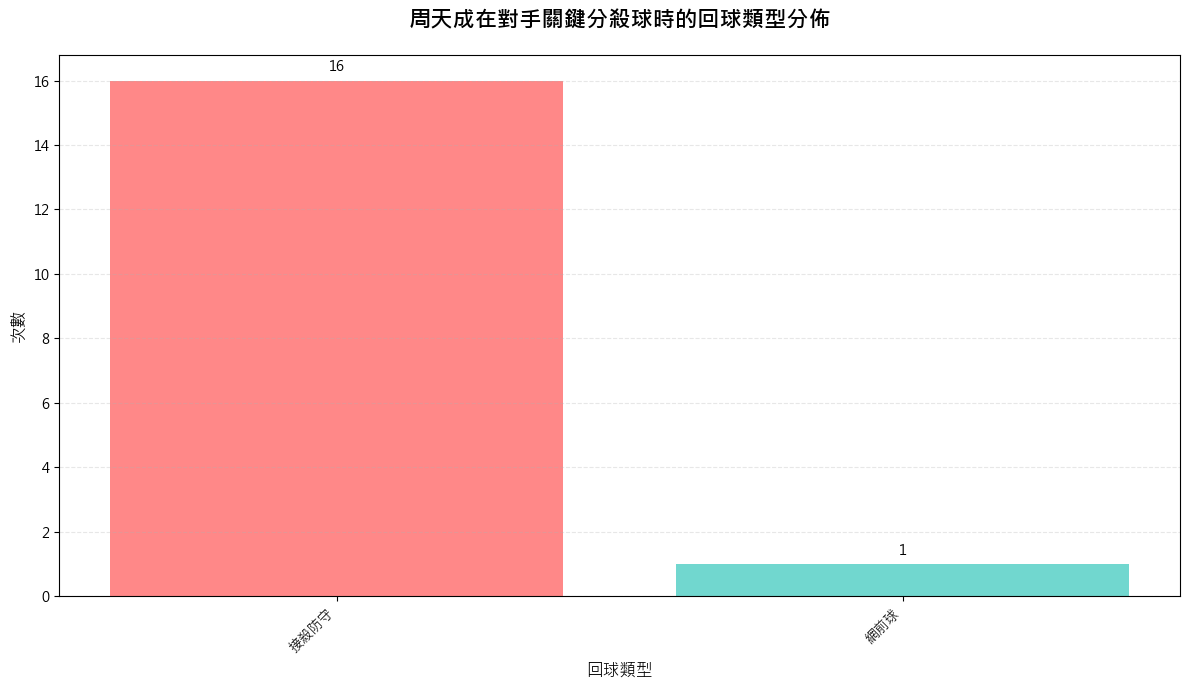

In [4]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'WenQuanYi Micro Hei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 1. 篩選出對手在關鍵分（18分以上）殺球且周天成為擊球者的數據
opponent_smash = df[(df['opponent_score'] >= 18) & (df['player'] == 'CHOU Tien Chen') & (df['opponent_type'] == 4.0)].copy()

# 2. 計算周天成各種回球類型的次數和比例
shot_counts = opponent_smash['type'].value_counts()
shot_percentages = opponent_smash['type'].value_counts(normalize=True) * 100

# 3. 計算各種回球方式的失分率
loss_rates = {}
for shot_type in shot_counts.index:
    # 找到所有該回球類型的rally_id
    shot_rally_ids = opponent_smash[opponent_smash['type'] == shot_type]['rally_id'].unique()

    # 初始化失分次數
    losses = 0

    # 遍歷每個rally_id
    for rally_id in shot_rally_ids:
        # 篩選出當前rally_id中，周天成的所有擊球
        rally_shots = df[(df['rally_id'] == rally_id) & (df['player'] == 'CHOU Tien Chen')]

        # 找到最後一次擊球
        last_shot = rally_shots.iloc[-1]

        # 檢查該次擊球是否有失分原因
        if pd.notna(last_shot['lose_reason']):
            losses += 1

    # 計算失分率
    if shot_counts[shot_type] > 0:
        loss_rate = (losses / shot_counts[shot_type]) * 100
    else:
        loss_rate = 0
    loss_rates[shot_type] = loss_rate

# 4. 創建一個DataFrame來呈現結果
results_df = pd.DataFrame({
    '回球類型': shot_counts.index,
    '次數': shot_counts.values,
    '比例 (%)': shot_percentages.values,
    '失分率 (%)': [loss_rates[shot] for shot in shot_counts.index]
})

print(results_df)

# 5. 可視化回球類型分佈（長條圖）
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(results_df['回球類型'], results_df['次數'], color=colors, alpha=0.8)

# 在柱子上方標註數值
for i, v in enumerate(results_df['次數']):
    ax.text(i, v + max(results_df['次數'])*0.01, str(int(v)),
            ha='center', va='bottom', fontsize=10)

ax.set_title('周天成在對手關鍵分殺球時的回球類型分佈', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('回球類型', fontsize=12)
ax.set_ylabel('次數', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
plt.tight_layout()

46

In [5]:
import pandas as pd

# 定義防守和進攻狀態的球種
defensive_types = ['接殺防守', '網前球']
offensive_types = ['殺球', '推撲球']

# 篩選出周天成擊球的數據
chou_data = df[df['player'] == 'CHOU Tien Chen'].copy()

# 初始化計數器
successful_turnarounds = 0

# 遍歷每個match_id和set
for match_id in chou_data['match_id'].unique():
    for set_num in chou_data[chou_data['match_id'] == match_id]['set'].unique():
        # 篩選出當前match_id和set的數據
        set_data = chou_data[(chou_data['match_id'] == match_id) & (chou_data['set'] == set_num)].copy()

        # 遍歷每個rally
        for rally in set_data['rally'].unique():
            rally_data = set_data[set_data['rally'] == rally].copy()

            # 找到所有連續三拍或三拍以上的回合
            if len(rally_data) >= 3:
                for i in range(len(rally_data) - 2):
                    # 檢查前兩拍是否為防守狀態
                    if (rally_data.iloc[i]['type'] in defensive_types) and (rally_data.iloc[i+1]['type'] in defensive_types):
                        # 檢查第三拍是否為進攻狀態
                        if rally_data.iloc[i+2]['type'] in offensive_types:
                            # 檢查該球局是否由周天成得分
                            last_shot = df[(df['match_id'] == match_id) & (df['set'] == set_num) & (df['rally'] == rally)]['getpoint_player'].iloc[-1]
                            if last_shot == 'CHOU Tien Chen':
                                successful_turnarounds += 1
                                break  # 每個rally只計一次

# 輸出結果
print(f"周天成在連續三拍或三拍以上的回合中，先防守後進攻並最終得分的球局數量：{successful_turnarounds}")

周天成在連續三拍或三拍以上的回合中，先防守後進攻並最終得分的球局數量：28


47

周天成得分回合的平均拍數：12.99
周天成失分回合的平均拍數：12.55
周天成得分回合的平均拍數較高。


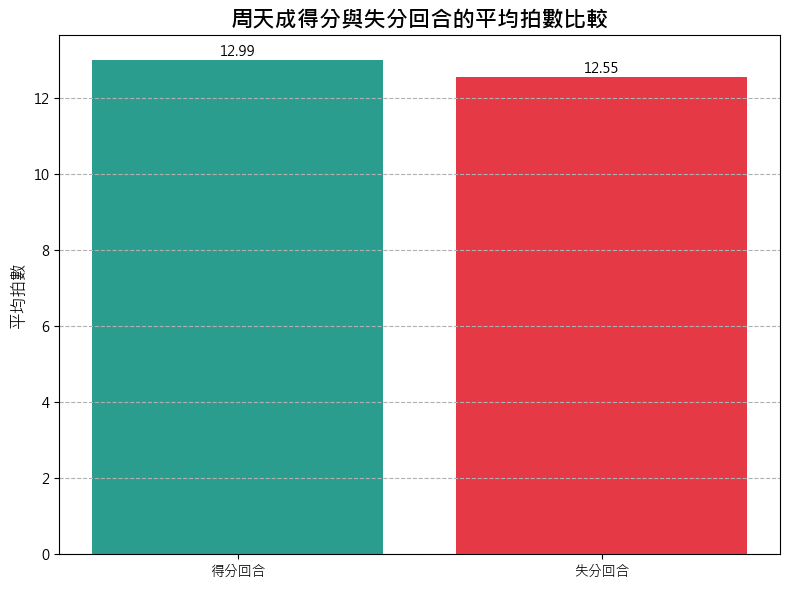

In [6]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'WenQuanYi Micro Hei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 1. 篩選出 'player' 欄位為 'CHOU Tien Chen' 的所有回合
chou_rounds = df[df['player'] == 'CHOU Tien Chen'].copy()

# 2. 計算「得分」回合的平均拍數
scoring_rounds = chou_rounds[chou_rounds['getpoint_player'] == 'CHOU Tien Chen']
if not scoring_rounds.empty:
    avg_scoring_rounds = scoring_rounds['ball_round'].mean()
    print(f"周天成得分回合的平均拍數：{avg_scoring_rounds:.2f}")
else:
    avg_scoring_rounds = 0
    print("沒有找到周天成得分回合的數據。")

# 3. 計算「失分」回合的平均拍數
losing_rounds = chou_rounds[(chou_rounds['getpoint_player'] != 'CHOU Tien Chen') & (chou_rounds['getpoint_player'].notna())]
if not losing_rounds.empty:
    avg_losing_rounds = losing_rounds['ball_round'].mean()
    print(f"周天成失分回合的平均拍數：{avg_losing_rounds:.2f}")
else:
    avg_losing_rounds = 0
    print("沒有找到周天成失分回合的數據。")

# 4. 比較這兩個平均拍數
if avg_scoring_rounds > 0 or avg_losing_rounds > 0:
    if avg_scoring_rounds > avg_losing_rounds:
        comparison_result = "周天成得分回合的平均拍數較高。"
    elif avg_scoring_rounds < avg_losing_rounds:
        comparison_result = "周天成失分回合的平均拍數較高。"
    else:
        comparison_result = "周天成得分回合和失分回合的平均拍數相同。"
    print(comparison_result)
else:
    comparison_result = "沒有找到足夠的數據來比較周天成得分和失分回合的平均拍數。"

# 5. 將結果儲存在變數中
results = {
    "avg_scoring_rounds": avg_scoring_rounds,
    "avg_losing_rounds": avg_losing_rounds,
    "comparison_result": comparison_result
}

# 可视化呈現
labels = ['得分回合', '失分回合']
avg_round_nums = [results['avg_scoring_rounds'], results['avg_losing_rounds']]
colors = ['#2A9D8F', '#E63946']  # 綠色代表得分，紅色代表失分

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, avg_round_nums, color=colors)

# 在柱子上方標註數值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

ax.set_ylabel('平均拍數', fontsize=12)
ax.set_title('周天成得分與失分回合的平均拍數比較', fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle='--')

plt.tight_layout()

48

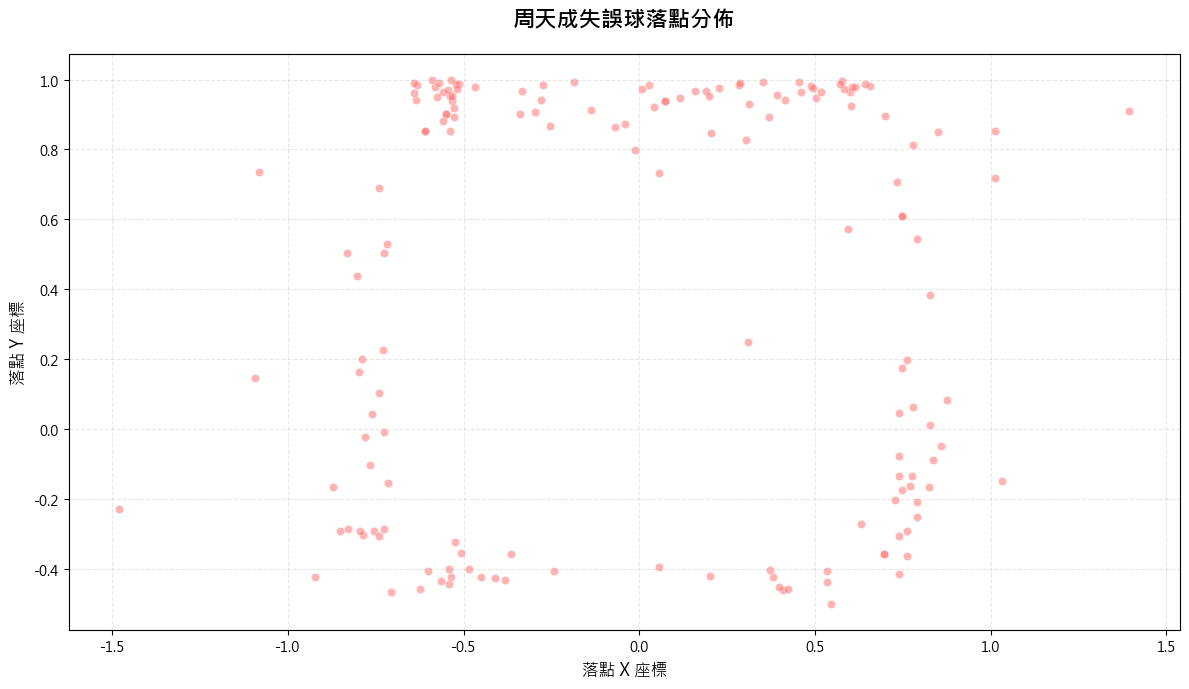

In [7]:
import platform
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'WenQuanYi Micro Hei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選 'player' 欄位為 'CHOU Tien Chen' 且 'lose_reason' 欄位不為空的資料
chou_errors = df[(df['player'] == 'CHOU Tien Chen') & (df['lose_reason'].notna())]

# 建立固定尺寸的圖表
fig, ax = plt.subplots(figsize=(12, 7))

# 繪製散佈圖
if not chou_errors.empty:
    sns.scatterplot(x='landing_x', y='landing_y', data=chou_errors, ax=ax, color='#FF6B6B', alpha=0.5)

    # 設定標題和標籤
    ax.set_title('周天成失誤球落點分佈', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('落點 X 座標', fontsize=12)
    ax.set_ylabel('落點 Y 座標', fontsize=12)

    # 加入網格線
    ax.grid(True, alpha=0.3, linestyle='--')

    # 調整布局避免文字被裁切
    plt.tight_layout()
else:
    ax.text(0.5, 0.5, '找不到周天成的失誤球數據', ha='center', va='center', fontsize=12)
    ax.axis('off')

In [8]:
49

49

lose_reason
出界     74
掛網     60
未過網    24
Name: count, dtype: int64


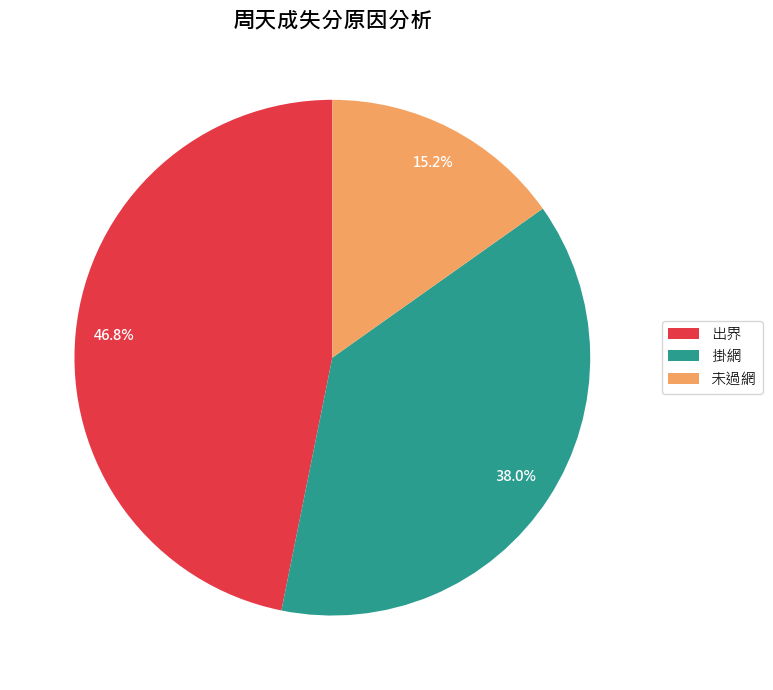

In [9]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
system = platform.system()
if system == 'Darwin':
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'sans-serif']
elif system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'sans-serif']
else:
    plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'WenQuanYi Micro Hei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 篩選 'player' 欄位為 'CHOU Tien Chen' 的資料
chou_data = df[df['player'] == 'CHOU Tien Chen']

# 篩選出對手得分的資料 (getpoint_player 不是 CHOU Tien Chen)
opponent_getpoint = df[df['getpoint_player'] != 'CHOU Tien Chen']

# 合併條件，找出周天成的失分原因
chou_lose_reasons = opponent_getpoint[opponent_getpoint['player'] == 'CHOU Tien Chen']['lose_reason'].dropna()

# 統計 'lose_reason' 欄位中每個原因出現的次數
lose_reason_counts = chou_lose_reasons.value_counts()

# 建立固定尺寸的圖表
fig, ax = plt.subplots(figsize=(12, 7))

# 圓餅圖專用色系（對比度高）
colors = ['#E63946', '#2A9D8F', '#F4A261', '#264653', '#E76F51', '#8338EC', '#06BCC1', '#FF6B35']

if not lose_reason_counts.empty:
    # 繪製圓餅圖
    wedges, texts, autotexts = ax.pie(lose_reason_counts, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)

    # 設定圓餅圖樣式
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    # 設定標題
    ax.set_title('周天成失分原因分析', fontsize=16, fontweight='bold')

    # 創建圖例放在圓餅圖旁邊，不使用 labels 參數
    ax.legend(wedges, lose_reason_counts.index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)

    # 調整布局
    plt.tight_layout()
else:
    ax.text(0.5, 0.5, '找不到周天成的失分原因數據', ha='center', va='center', fontsize=12)
    ax.axis('off')
    plt.tight_layout()

print(lose_reason_counts)

50

In [10]:
import pandas as pd

# 篩選 'getpoint_player' 欄位為 'CHOU Tien Chen' 的所有資料
chou_getpoint = df[df['getpoint_player'] == 'CHOU Tien Chen']

# 計算篩選後資料中 'ball_round' 欄位的平均值
if not chou_getpoint.empty:
    average_ball_round = chou_getpoint['ball_round'].mean()

    print(f"周天成得分回合的平均擊球數: {average_ball_round:.2f}")

    # 判斷周天成是傾向於短拍數得分還是長拍數得分
    if average_ball_round < 5:
        tendency = "短拍數得分"
    elif average_ball_round < 10:
        tendency = "中等拍數得分"
    else:
        tendency = "長拍數得分"

    print(f"周天成傾向於: {tendency}")
else:
    average_ball_round = None
    print("找不到周天成得分的資料")

周天成得分回合的平均擊球數: 12.48
周天成傾向於: 長拍數得分
